In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### QUESTION 1

1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

 Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

 If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

In [5]:
X = df
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Text(0.5, 1.0, 'Elbow curve')

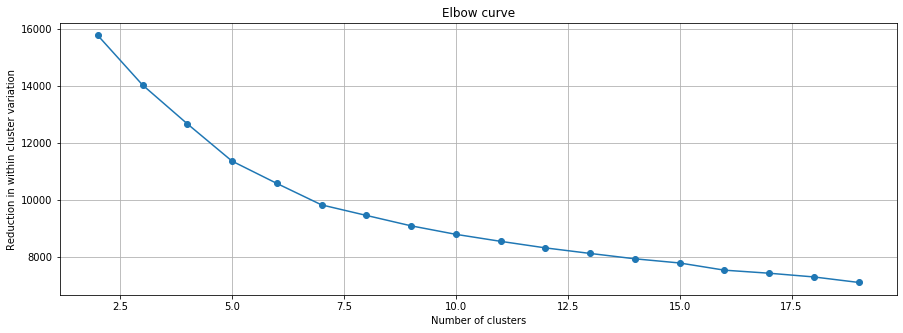

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

within_cluster_variance = [] 

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')

As the plot shows, when k = 7, the variance within cluster is small enough, and the speed of reduction is small after that, so I will choose k=7

In [7]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X_scaled)
df['cluster'] = kmeans.labels_
df.groupby(df['cluster']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,7.572505,0.647444,0.118493,2.259776,0.085183,10.793279,32.875764,0.996761,3.363971,0.587475,9.883062,5.224033
1,8.094925,0.532194,0.282507,2.509552,0.085630,26.335821,87.026866,0.997123,3.296627,0.629224,9.812935,5.292537
2,8.462069,0.531034,0.493793,1.975862,0.351172,15.137931,62.068966,0.997097,3.050690,1.288621,9.482759,5.344828
3,6.437186,0.588744,0.095126,2.157286,0.067985,18.763819,41.145729,0.994236,3.488241,0.636985,11.674204,6.040201
4,11.224790,0.429097,0.508866,2.705042,0.089996,10.760504,32.201681,0.999011,3.158697,0.695756,10.278431,5.710084
5,8.782051,0.349396,0.418132,2.398535,0.076073,12.329670,28.857143,0.995790,3.271502,0.736923,11.504762,6.472527
6,8.170588,0.521618,0.351765,9.532353,0.101412,34.176471,102.235294,0.999058,3.260882,0.654118,10.035294,5.617647


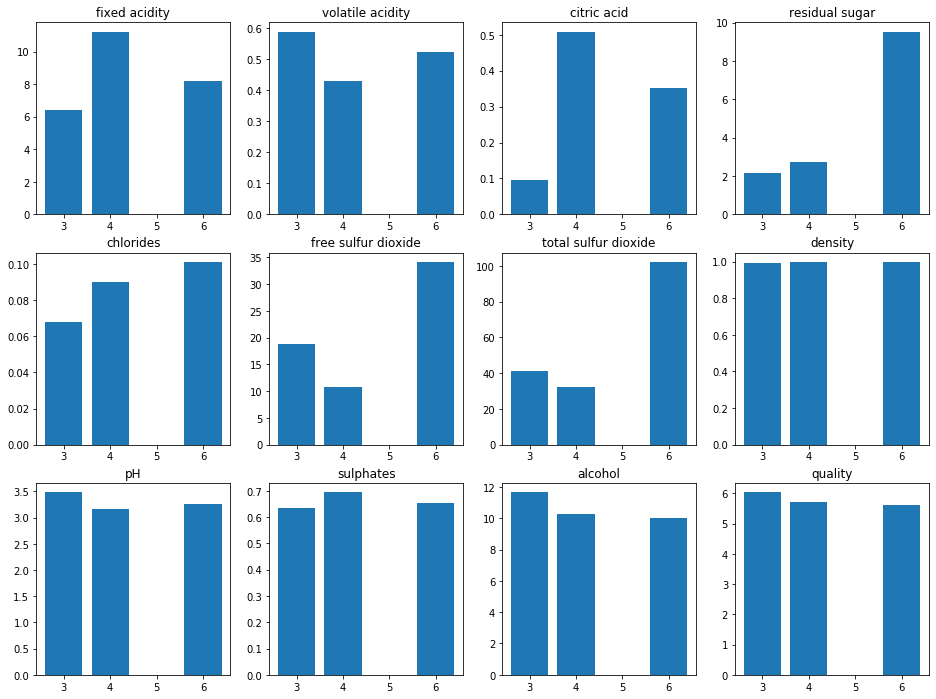

In [8]:
## cluster 3 have high quality, cluster 4,6 have low quality, so I choose these four to make barplot
import matplotlib.pyplot as plt
var1 = df.groupby(df['cluster']).mean()
var1 = var1.iloc[[3,4,6]]
c = 1 
plt.figure(figsize=[16,12])
for i in range(0,12):
    ax = plt.subplot(3, 4, c)
    ax.bar(x = var1.index, height=var1.iloc[:,i])
    ax.set_title(var1.columns[i])
    c += 1

##### Answer1:
- Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

    The average wine quality is 5.64. Cluster 3 has  higher value of wine quality, which is above 6.5. Cluster 4 and Cluster 6 have lower quality of wine, which is below 5.3. 
    
    
- Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.
    
    The fixed acidity of cluster with higher quality value is 8.5, the volatile acidity is 0.35, the citric acid is 0.41, the residual sugar is 2.38, the chlorides are 0.07, the free sulfur dioxide is 13.4, the total sulfur dioxide is 29.8, the density is 0.995, the pH is 3.28, the sulphates are 0.73, the alcohol is 11.6.
  The fixed acidity of cluster with lower quality value is between 7.5 and 8.2, the volatile acidity is abbetween  0.5 and 0.65, the citric acid is 0.12 and 0.29, the residual sugar is 2.24 and 2.51, the chlorides are around 0.08, the free sulfur dioxide is 11.05 and 25.93, the total sulfur dioxide is below 86 and 32, the density is around 0.996, the pH is around 3.29 and 3.369, the sulphates are around 0.6, the alcohol is around 9.8.
  
    

- If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?
    
    I need to increase the values of 'citric acid', 'chlorides' and 'sulphates'.
    

### Question 2

In [9]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=7,   # note that we select the clusters
                             affinity='euclidean', 
                             linkage='complete').fit(X_scaled)
df['cluster'] = ac.labels_
df.groupby(df['cluster']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
cluster,,,,,,,,,,,,,
0,6.409231,0.604962,0.130462,2.138846,0.068546,13.980769,40.361538,0.993743,3.485077,0.607769,12.052051,5.769231,0.0
1,8.341270,0.509762,0.373810,2.076190,0.214841,14.761905,60.619048,0.997238,3.153333,1.096190,9.650794,5.365079,1.0
2,8.336948,0.527311,0.265258,2.478646,0.082402,16.119297,46.345550,0.996878,3.313007,0.636896,10.300661,5.614061,2.0
3,8.450000,0.465000,0.880000,2.600000,0.610500,20.000000,57.000000,0.998200,2.900000,1.630000,9.400000,4.500000,3.0
4,7.233333,0.296667,0.536667,10.000000,0.055667,49.000000,242.333333,0.994510,3.116667,0.520000,11.633333,6.666667,4.0
5,12.641176,0.410196,0.581176,2.810784,0.084824,10.941176,31.588235,0.999517,3.060196,0.767647,10.562745,6.176471,5.0
6,8.815385,0.420769,0.393846,12.169231,0.117538,26.153846,63.076923,1.000338,3.233846,0.677692,9.784615,5.692308,6.0


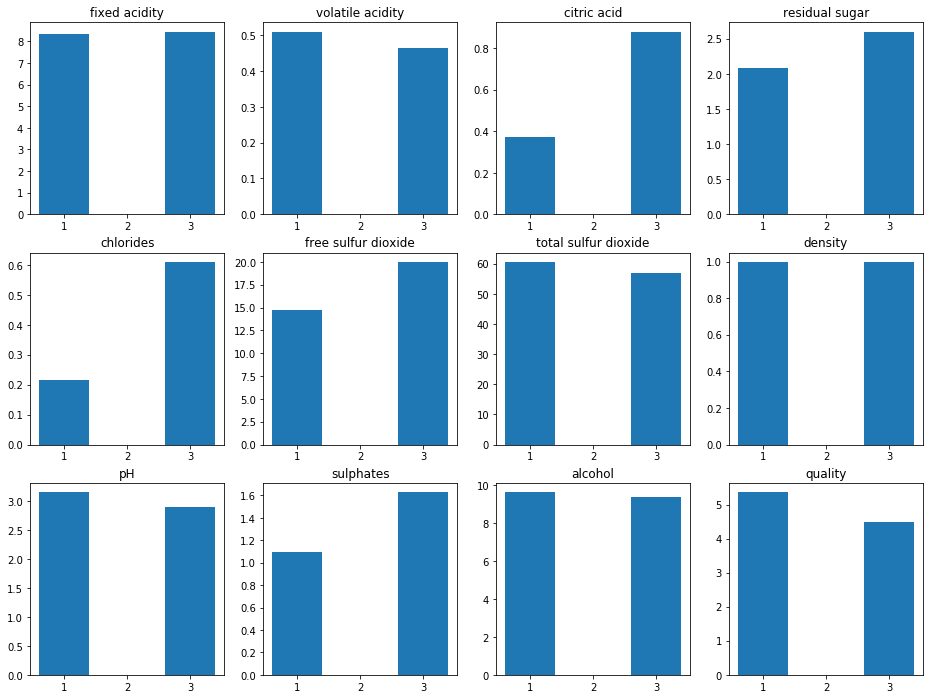

In [10]:
import matplotlib.pyplot as plt
var1 = df.groupby(df['cluster']).mean()
var1 = var1.iloc[[1,3]]
c = 1 
plt.figure(figsize=[16,12])
for i in range(0,12):
    ax = plt.subplot(3, 4, c)
    ax.bar(x = var1.index, height=var1.iloc[:,i])
    ax.set_title(var1.columns[i])
    c += 1

##### Answer 2:

- Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.
  
  There are 2 clusters, one with wine quality of 7, far exceeding the average value; one with wine quality of 5.63, slightly below that of average. 
  
  
- Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.
    
  The fixed acidity of cluster with higher quality value is 7.34, the volatile acidity is 0.46, the citric acid is 0.23, the residual sugar is 2.16, the chlorides are 0.07, the free sulfur dioxide is 19.9, the total sulfur dioxide is 44.6, the density is 0.995, the pH is 3.40, the sulphates are 0.68, the alcohol is 11.5.
   The fixed acidity of cluster with higher quality value is 8.45, the volatile acidity is 0.46, the citric acid is 0.88, the residual sugar is 2.6, the chlorides are 0.61, the free sulfur dioxide is 20, the total sulfur dioxide is 57, the density is 0.998, the pH is 2.90, the sulphates are 1.63, the alcohol is 9.4.
  

- If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

  I need to decrease the values of 'citric acid', 'chlorides' and 'sulphates'. The answer is completely opposite to question 1. The figure is shown in the upward chunk.

### QUESTION 3

3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_scaled)

In [12]:
print(pca.explained_variance_)
print('the first two components explained {0} of the total variance'.format(sum(pca.explained_variance_ratio_)))

[3.12312087 2.24328497]
the first two components explained 0.44692081170691766 of the total variance


In [14]:
?PCA

PCA can be used to reduce the dimension of data in supervised learning. The ﬁrst principal component direction of the data is that along which the observations vary the most, and followed the second. To do supervised learning, first we need to construct the first two principal components as independent variables, and then calculate the principal component score for each observation as values of independent variables. The dependent variable is some other variable tied to wine (e.g. - wine price). 